In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
import folium

## Đọc dữ liệu

In [3]:
data_folder='../Dataset/'

In [5]:
data = pd.read_csv(data_folder + 'dataset.csv')
test_data = pd.read_csv(data_folder + 'test.csv')

Không sửa bên trên, dán được ở đây chạy được rồi thì tính tới merge

## II . Nhóm đặc trưng về giao dịch  <a id="ii"></a>

**a) Các đặc trưng về giao dịch mua bán**

| Tên đặc trưng         | Mô tả                |
|-----------------------|---------------------------------------------|
| sale_date             | Ngày bán                     |
| sale_price            | Giá bán                     |
| sale_nbr              | Số lần căn nhà được bán                    |
| sale_warning          | Mức cảnh báo giao dịch                     |
| join_status           | Trạng thái khi hợp với bộ dữ liệu khác                     |
| join_year             | Năm ghi nhận dữ liệu                     |

In [ ]:
trans_cols= ['sale_date', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status', 'join_year']
trans_data= data[trans_cols]
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sale_date     200000 non-null  object 
 1   sale_price    200000 non-null  int64  
 2   sale_nbr      157818 non-null  float64
 3   sale_warning  200000 non-null  object 
 4   join_status   200000 non-null  object 
 5   join_year     200000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.2+ MB


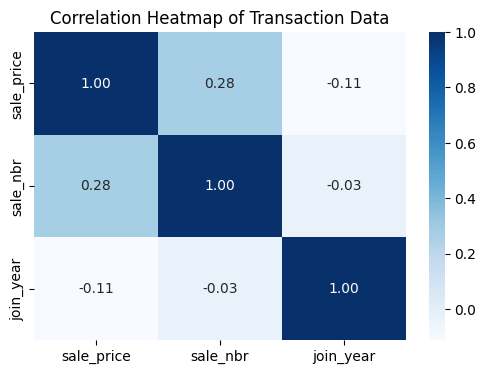

In [ ]:
trans_num_cols = trans_data.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(trans_num_cols.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Transaction Data")
plt.show()

## II . Nhóm đặc trưng về cảnh quan <a id="ii"></a>

| Tên đặc trưng         | Mô tả                |
|-----------------------|---------------------------------------------|
| view_rainier          | Có tầm nhìn ra núi Rainier.                     |
| view_olympics         | Có tầm nhìn ra dãy núi Olympic.                     |
| view_cascades         | Có tầm nhìn ra dãy núi Cascade.                     |
| view_territorial      | Có tầm nhìn bao quát hoặc tầm nhìn rộng (không cụ thể).                     |
| view_skyline          | Có tầm nhìn ra đường chân trời của thành phố.                     |
| view_sound            | Có tầm nhìn ra vùng biển Puget Sound.                     |
| view_lakewash         | Có tầm nhìn ra hồ Washington.                     |
| view_lakesamm         | Có tầm nhìn ra hồ Sammamish.                     |
| view_otherwater       | Có tầm nhìn ra các vùng nước khác.                     |
| view_other            | Các loại tầm nhìn khác (không nằm trong các nhóm trên).                     |

In [7]:
import re

Đầu tiên, chúng ta sẽ tiến hành khám phá tính chất của các cột đặc trưng liên quan đến cảnh quan

In [21]:
view_re = re.compile(r'^view_\w+$')
view_cols = [col for col in list(data.columns) if view_re.match(col) != None]
view_data = data[view_cols]

view_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   view_rainier      200000 non-null  int64
 1   view_olympics     200000 non-null  int64
 2   view_cascades     200000 non-null  int64
 3   view_territorial  200000 non-null  int64
 4   view_skyline      200000 non-null  int64
 5   view_sound        200000 non-null  int64
 6   view_lakewash     200000 non-null  int64
 7   view_lakesamm     200000 non-null  int64
 8   view_otherwater   200000 non-null  int64
 9   view_other        200000 non-null  int64
dtypes: int64(10)
memory usage: 15.3 MB


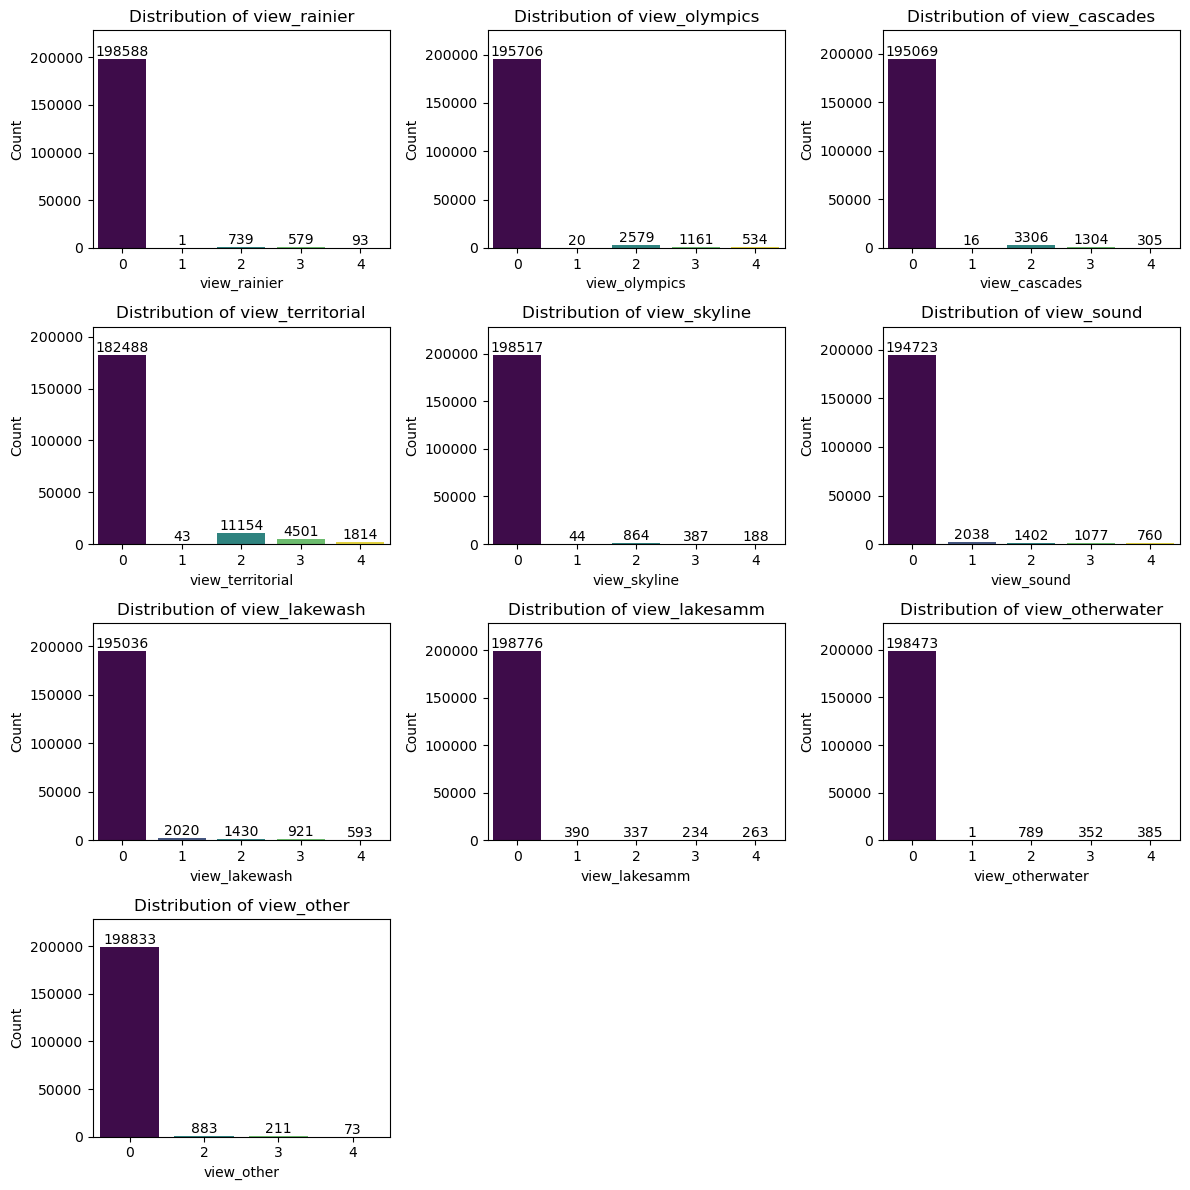

In [32]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(view_cols):
    plt.subplot(4, 3, i + 1)
    
    ax = sns.countplot(x=col, hue=col, data=view_data, palette='viridis', legend=False)

    # Tìm chiều cao lớn nhất để set ylim sau
    max_height = 0

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
        if height > max_height:
            max_height = height

    # Tăng trục y thêm 15% để tránh tràn chữ
    ax.set_ylim(0, max_height * 1.15)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Tất cả các đặc trưng liên quan đến cảnh quan đều có kiểu số nguyên và được đánh số từ 0 đến 4. Từ quan sát phân bố của các giá trị, ta thấy phần lớn các ngôi nhà (khoảng hơn 90%) có cảnh quan xung quanh nằm ở mức 0 (không có cảnh quan). Tiếp theo chúng ta tiến hành khảo sát tương quan giữa các đặc trưng này với nhau và với giá bán của căn nhà.

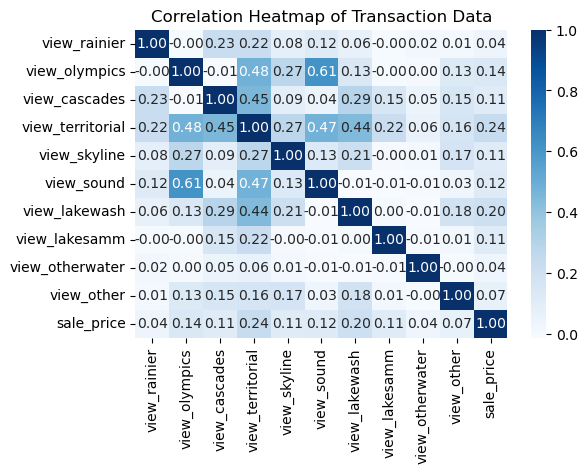

In [ ]:
view_price_data = data[view_cols + ['sale_price']]

plt.figure(figsize=(6, 4))
sns.heatmap(view_price_data.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Transaction Data")
plt.show()

- Thông qua ma trận tương quan, ta có thể thấy giá nhà có tương quan dương nhẹ với các đặc trưng liên quan đến cảnh quan. Trong thực tế những căn nhà có view đẹp thường được đánh giá cao hơn so với bình thường. Tuy nhiên đây không hoàn toàn là yếu tố then chốt để quyết định giá trị của căn nhà, do đó tương quan dương nhẹ là hoàn toàn hợp lý.
- Bên cạnh đó, ta cũng xác định được tính hợp lý của dữ liệu dựa trên tương quan giữa các đặc trưng cảnh quan và vị trí địa lý của chúng trong thực tế. 